### 서포트벡터머신(SVM, Support Vector Machine)

In [1]:
library(e1071)
data(iris)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [2]:
# 랜텀샘플링
set.seed(42)
samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))

data.train <- iris[samp, ]
data.test <- iris[-samp, ]

In [3]:
# svm()
model <- svm(Species~., data=data.train)
model


Call:
svm(formula = Species ~ ., data = data.train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  41


In [4]:
# SVM으로 예측
# 품종컬럼제외
x <- subset(data.test, select=-Species)
y <- data.test$Species

pred <- predict(model, x)
table(pred, y)
mean(pred==y) # 91%정도 예측율

            y
pred         setosa versicolor virginica
  setosa         14          0         0
  versicolor      1         14         2
  virginica       0          1        13

[1] 0.9111111

In [5]:
model <- svm(Species~Petal.Length+Petal.Width, data=data.train)
model


Call:
svm(formula = Species ~ Petal.Length + Petal.Width, data = data.train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  29


In [6]:
x <- subset(data.test, select=-Species)
y <- data.test$Species

pred <- predict(model, x)
table(pred, y)
mean(pred==y) # 93%정도 예측율

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

[1] 0.9333333

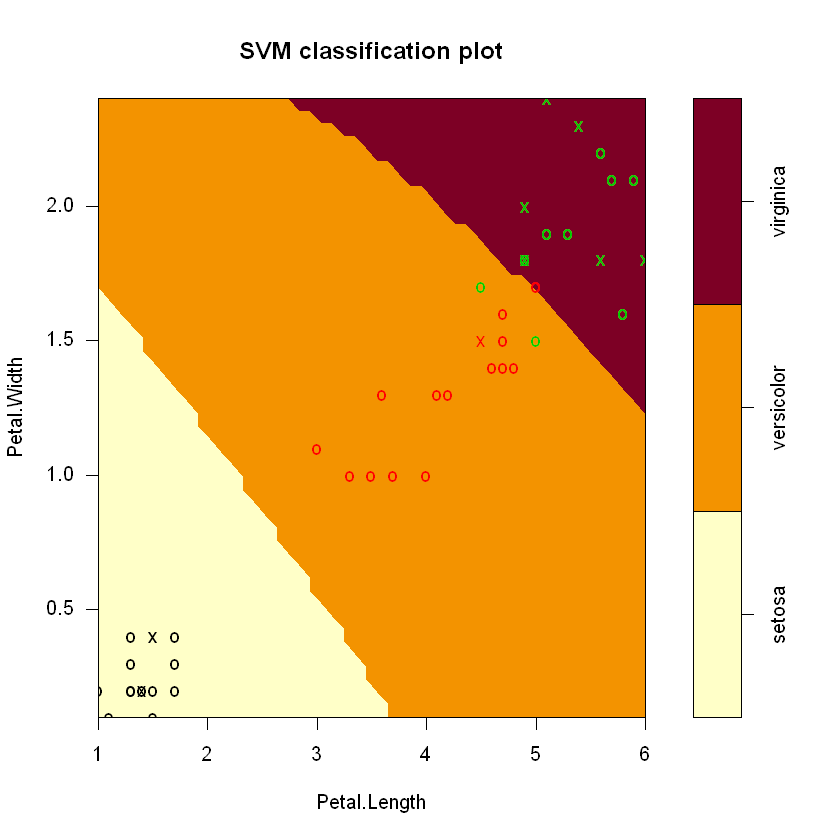

In [7]:
# 검증용데이터셋으로 SVM시각화
plot(model, data.test, Petal.Width~Petal.Length, slice=list(Sepal.Width=3, Sepal.Length=4))

# x : support vectors
# o : 데이터